In [100]:
import numpy as np
import matplotlib.pyplot as plt
from lr_utils import load_dataset,sigmoid

train_set_x_orig , train_set_y , test_set_x_orig , test_set_y  = load_dataset()

#将训练集的维度降低并转置。
train_set_x_flatten  = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
#将测试集的维度降低并转置。
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x = train_set_x_flatten / 255 #(特征数n0,样本数m)
test_set_x = test_set_x_flatten / 255 #(特征数n0,样本数m)

In [101]:
def initialize_params(n0,n1,n2):
    """
        此函数创建双层神经网络中所需要的权重w1,w2;偏差b1,b2。

        参数：
            n0  - 输入层的特征数量
            n1  - 默认只有一层隐藏层的特征数量（神经元数）
            n2   - 输出层的神经元数量
        返回：
            params - {w1,w2,b1,b2}
    """
    w1 = np.random.randn(n1,n0) * 0.001
    w2 = np.random.randn(n2,n1) * 0.001
    b1 = np.zeros((n1,1))
    b2 = np.zeros((n2,1))

    params = {
        "W1":w1,
        "W2":w2,
        "b1":b1,
        "b2":b2
    }
    return params
# print(initialize(3,2,1))

In [102]:
def forward_propagation( X , params ):
    """
    参数：
         X - 维度为（n_0，m）的输入数据。
         params - 初始化函数（initialize_params）的输出
    
    返回：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型变量
     """
    W1 = params["W1"] #(n1,n0)
    b1 = params["b1"] #(n1,1)
    W2 = params["W2"] #(n2,n1)
    b2 = params["b2"] #(n2,1)
    #前向传播计算A2
    Z1 = np.dot(W1 , X) + b1 #(n1,m)
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2 , A1) + b2 #(n2,m)
    A2 = sigmoid(Z2) #(n2,m)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return (A2, cache)

In [103]:
def compute_cost(A2,Y):
    """
    返回代价函数的值
    参数：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         Y - "True"标签向量,维度为（1，数量）
         params - 一个包含W1，B1，W2和B2的字典类型的变量
    
    返回：
         cose - 成本 
    """
    
    m = Y.shape[1]
    
    #计算成本
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) # np.multiply(np.log(A2), Y) 可以写成np.log(A2)* Y ，虽然都是1*m的矩阵，但是还是可以相乘（数学上不可以，python可以，python会将他们当作对应元素的乘积）
    cost = - np.sum(logprobs) / m
#     cost = float(np.squeeze(cost))
    return cost

# params = initialize_params(train_set_x.shape[0],4,train_set_y.shape[0])
# (A2,cache) = forward_propagation(train_set_x,params)
# cost = compute_cost(A2,train_set_y)

In [104]:
def backward_propagation(params,cache,X,Y):
    """
    搭建反向传播函数。
    
    参数：
     params - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（n0，m）
     Y - 输出标签数据，维度为（n2，m）
    
    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """
    m = X.shape[1]
    
    W1 = params["W1"]
    W2 = params["W2"] #(n2,n1)
    
    A1 = cache["A1"] #(n1,m)
    A2 = cache["A2"]
    
    dZ2= A2 - Y #(n2,m)
    dW2 = (1 / m) * np.dot(dZ2, A1.T) #(n2,n1)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True) #(n2,1)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2)) #(n1,m)
    dW1 = (1 / m) * np.dot(dZ1, X.T) #(n1,n0)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True) #(n1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2 }
    
    return grads

In [105]:
def update_params(params,grads,learning_rate):
    """
    使用上面给出的梯度下降更新规则更新参数
    
    参数：
     params - 包含参数的字典类型的变量。
     grads - 包含导数值的字典类型的变量。
     learning_rate - 学习速率
    
    返回：
     params - 包含更新参数的字典类型的变量。
    """
    W1,W2 = params["W1"],params["W2"]
    b1,b2 = params["b1"],params["b2"]
    
    dW1,dW2 = grads["dW1"],grads["dW2"]
    db1,db2 = grads["db1"],grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return params

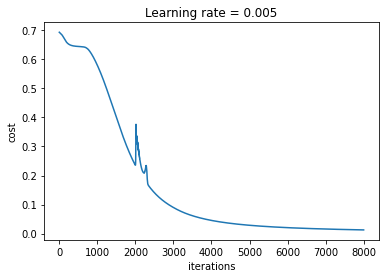

In [106]:
def nn_model(X,Y,n1,num_iterations,print_cost=False,learning_rate = 0.001):
    """
    参数：
        X - 数据集,维度为（n0，m）
        Y - 标签，维度为（n2，m）
        n1 - 隐藏层的数量n1
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值
    
    返回：
        params - 模型学习的参数，它们可以用来进行预测。
     """
     
    np.random.seed(3) #指定随机种子
    n0 = X.shape[0]
    # n1 = n1
    n2 = Y.shape[0]
    
    params = initialize_params(n0,n1,n2)
    
    costList = []
    for i in range(num_iterations):
        A2 , cache = forward_propagation(X,params)
        cost = compute_cost(A2,Y)
        costList.append(cost)
        grads = backward_propagation(params,cache,X,Y)
        params = update_params(params,grads,learning_rate)
        
        # if print_cost:
        #     if i%1000 == 0:
        #         print("第 ",i," 次循环，成本为："+str(cost))

    if print_cost:
        #绘制图
        plt.plot(costList)
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title("Learning rate = "+str(learning_rate))
        plt.show()

    return params

# n1List = [4,10,20,50]
# for i,v in enumerate(n1List):
#     plt.subplot(2,len(n1List)/2,i + 1)
#     params = nn_model(train_set_x,train_set_y,v,10000,print_cost=True)
params = nn_model(train_set_x,train_set_y,4,8000,print_cost=True,learning_rate = 0.005)


In [108]:
def predict(params,X):
    """
    使用学习的参数，为X中的每个示例预测一个类
    
    参数：
		params - 包含参数的字典类型的变量。
	    X - 输入数据（n_x，m）
    
    返回
		predictions - 我们模型预测的向量（红色：0 /蓝色：1）
     
     """
    A2 , cache = forward_propagation(X,params)
    predictions = np.zeros((1,A2.shape[1])) 
    for i in range(A2.shape[1]):
        #将概率a [0，i]转换为实际预测p [0，i]
        predictions[0,i] = 1 if A2[0,i] > 0.5 else 0

    return predictions
train_predict_y = predict(params,train_set_x)
test_predict_y = predict(params,test_set_x)

#打印训练后的准确性
print("训练集准确性："  , format(100 - np.mean(np.abs(train_predict_y - train_set_y)) * 100) ,"%")
print("测试集准确性："  , format(100 - np.mean(np.abs(test_predict_y - test_set_y)) * 100) ,"%")


训练集准确性： 100.0 %
测试集准确性： 70.0 %
